# Capstone Project: Predicting Airfare for New Market Entrants
## Doug Haunsperger, June 2024

### Section C - Data Preparation
Package import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn import tree

Read the CSV created in Excel to a Pandas DataFrame

Print and count the unique airports included in this data - these include many large airports such as JFK, LAX, DEN, ATL, ... as well as smaller airports such as SRQ (Sarasota/Bradenton FL), GPI (Glacier Park Int'l), ABQ (Albuquerque, NM), etc. In all, I have data on 146 airports.

In [5]:
df = pd.read_csv('Consumer_airfare_filtered_with_pax_counts_corr.csv')
unique_arpts = np.unique(np.concatenate((df.airport_1.unique(), df.airport_2.unique())))
print(unique_arpts)
print(unique_arpts.shape)

['ABE' 'ABQ' 'ACK' 'ACY' 'ALB' 'AMA' 'ASE' 'ATL' 'ATW' 'AUS' 'AVL' 'BDL'
 'BGR' 'BHM' 'BIL' 'BIS' 'BLI' 'BNA' 'BOI' 'BOS' 'BTV' 'BUF' 'BUR' 'BWI'
 'BZN' 'CAE' 'CAK' 'CHO' 'CHS' 'CID' 'CLE' 'CLT' 'CMH' 'COS' 'CVG' 'DAL'
 'DAY' 'DCA' 'DEN' 'DFW' 'DSM' 'DTW' 'ECP' 'EGE' 'ELP' 'EUG' 'EWR' 'EYW'
 'FAR' 'FAT' 'FLL' 'FNT' 'FSD' 'FWA' 'GEG' 'GPI' 'GRR' 'GSO' 'GSP' 'HOU'
 'HPN' 'HRL' 'HSV' 'HVN' 'IAD' 'IAH' 'ICT' 'ILM' 'IND' 'ISP' 'IWA' 'JAC'
 'JAN' 'JAX' 'JFK' 'LAS' 'LAX' 'LBB' 'LCK' 'LGA' 'LGB' 'LIT' 'MAF' 'MCI'
 'MCO' 'MDW' 'MEM' 'MFR' 'MHT' 'MIA' 'MKE' 'MSN' 'MSP' 'MSY' 'MVY' 'MYR'
 'OAK' 'OKC' 'OMA' 'ONT' 'ORD' 'ORF' 'ORH' 'PAE' 'PBI' 'PDX' 'PHF' 'PHL'
 'PHX' 'PIE' 'PIT' 'PNS' 'PSC' 'PSP' 'PVD' 'PVU' 'PWM' 'RDM' 'RDU' 'RIC'
 'RNO' 'ROC' 'RSW' 'SAN' 'SAT' 'SAV' 'SBA' 'SDF' 'SEA' 'SFO' 'SJC' 'SLC'
 'SMF' 'SNA' 'SRQ' 'STL' 'STS' 'SWF' 'SYR' 'TLH' 'TPA' 'TUL' 'TUS' 'TYS'
 'VPS' 'XNA']
(146,)


In [6]:
df.describe()


,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,pax_city1,pax_city2
count,7809.0,7809.000000,7809.000000,7809.000000,7809.000000,7809.000000,7809.000000,7809.000000,7809.000000,7803.000000,7803.000000,7803.000000,7803.000000,0.0,0.0,7.809000e+03,7.809000e+03
mean,2022.0,2.505570,31540.283263,32179.191958,12402.332693,13202.328083,1187.468178,381.530158,249.667511,0.700805,248.721329,0.515483,210.424337,NaN,NaN,1.103235e+07,1.022579e+07
std,0.0,1.113558,1106.512214,1249.705736,1419.797617,1421.251193,687.753732,598.901879,89.723644,0.220377,96.662674,0.338281,84.630568,NaN,NaN,1.179642e+07,8.977560e+06
min,2022.0,1.000000,30135.000000,30189.000000,10135.000000,10466.000000,148.000000,0.000000,67.910000,0.234100,67.910000,0.010000,50.400000,NaN,NaN,7.009800e+04,8.008900e+04
25%,2022.0,2.000000,30721.000000,30977.000000,11066.000000,12197.000000,643.000000,38.000000,186.440000,0.508850,182.605000,0.203300,150.340000,NaN,NaN,1.716904e+06,2.204395e+06
50%,2022.0,3.000000,31295.000000,32337.000000,12266.000000,13303.000000,1020.000000,158.000000,234.000000,0.690000,232.650000,0.463600,199.160000,NaN,NaN,5.536313e+06,7.241882e+06
75%,2022.0,3.000000,32467.000000,33195.000000,13342.000000,14570.000000,1671.000000,457.000000,300.820000,0.924450,302.090000,0.878000,257.315000,NaN,NaN,1.744378e+07,1.436746e+07
max,2022.0,4.000000,35412.000000,35412.000000,15919.000000,15919.000000,2724.000000,6439.000000,956.410000,1.000000,1091.020000,1.000000,870.000000,NaN,NaN,4.539600e+07,3.534514e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7809 entries, 0 to 7808
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tbl             7809 non-null   object 
 1   Year            7809 non-null   int64  
 2   quarter         7809 non-null   int64  
 3   citymarketid_1  7809 non-null   int64  
 4   citymarketid_2  7809 non-null   int64  
 5   city1           7809 non-null   object 
 6   city2           7809 non-null   object 
 7   airportid_1     7809 non-null   int64  
 8   airportid_2     7809 non-null   int64  
 9   airport_1       7809 non-null   object 
 10  airport_2       7809 non-null   object 
 11  nsmiles         7809 non-null   int64  
 12  passengers      7809 non-null   int64  
 13  fare            7809 non-null   float64
 14  carrier_lg      7803 non-null   object 
 15  large_ms        7803 non-null   float64
 16  fare_lg         7803 non-null   float64
 17  carrier_low     7803 non-null   o

`tbl`, `Year` are the same for all records - these columns will be dropped. `Geocoded_City[1,2]` are null for all records - these columns will also be dropped. `tbl1apk` is a concatenation of several other columns and is not useful; it will also be dropped.
The `info()` function shows that six records do not have market share data - I will drop these records. 


In [9]:
df=df.drop(columns=['tbl','Year','Geocoded_City1','Geocoded_City2','tbl1apk'])
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7803 entries, 0 to 7808
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   quarter         7803 non-null   int64  
 1   citymarketid_1  7803 non-null   int64  
 2   citymarketid_2  7803 non-null   int64  
 3   city1           7803 non-null   object 
 4   city2           7803 non-null   object 
 5   airportid_1     7803 non-null   int64  
 6   airportid_2     7803 non-null   int64  
 7   airport_1       7803 non-null   object 
 8   airport_2       7803 non-null   object 
 9   nsmiles         7803 non-null   int64  
 10  passengers      7803 non-null   int64  
 11  fare            7803 non-null   float64
 12  carrier_lg      7803 non-null   object 
 13  large_ms        7803 non-null   float64
 14  fare_lg         7803 non-null   float64
 15  carrier_low     7803 non-null   object 
 16  lf_ms           7803 non-null   float64
 17  fare_low        7803 non-null   f

#### Select target feature and candidate explanatory features

In [11]:
# Target variable
target='fare'
# Quantitative explanatory
quant_cols=['nsmiles', 'passengers', 'large_ms', 'fare_lg', 'lf_ms', 'fare_low', 'pax_city1', 'pax_city2']
# Categorical explanatory
cat_cols = ['quarter', 'carrier_lg', 'carrier_low', 'airport_1', 'airport_2']


#### Plot distributions and check for outliers

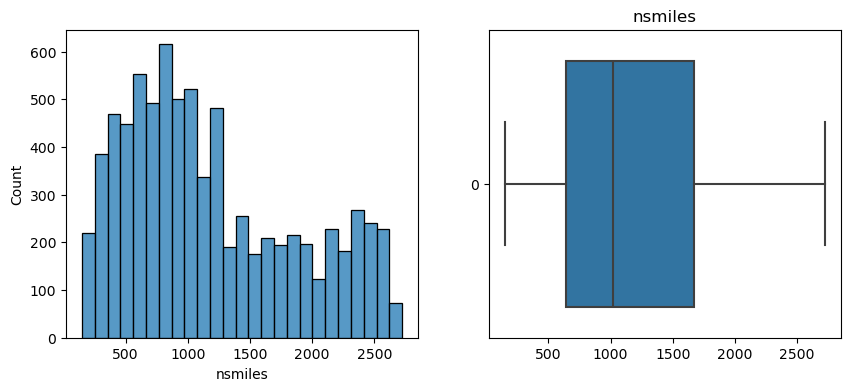

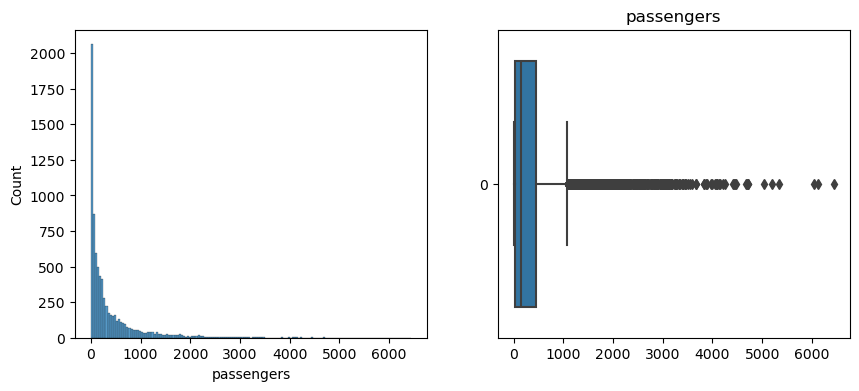

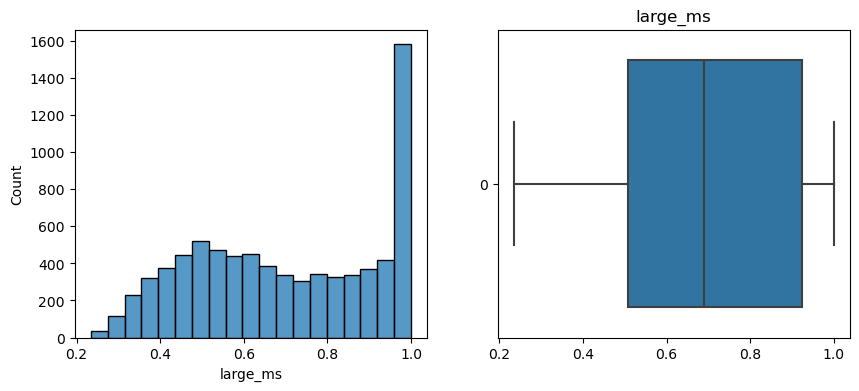

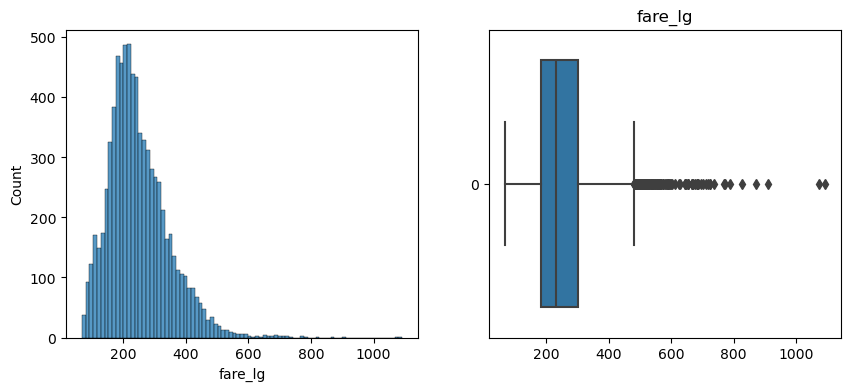

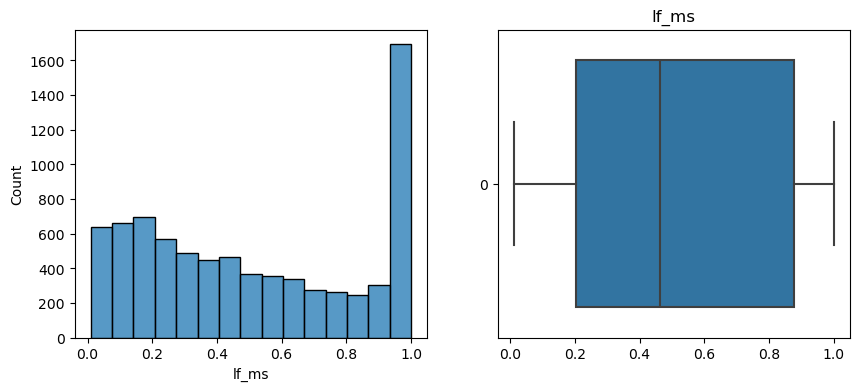

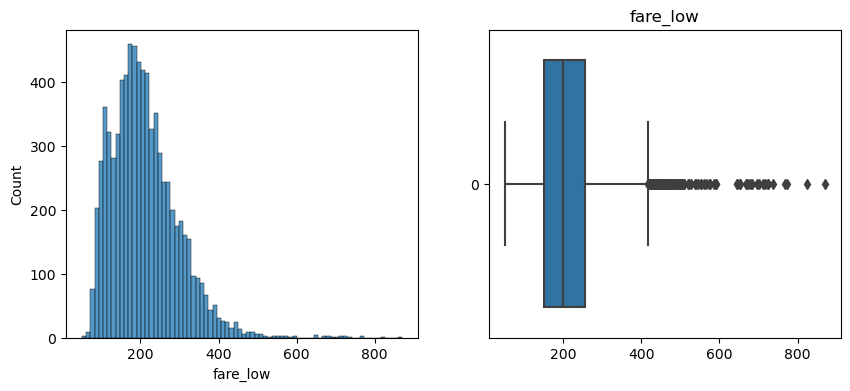

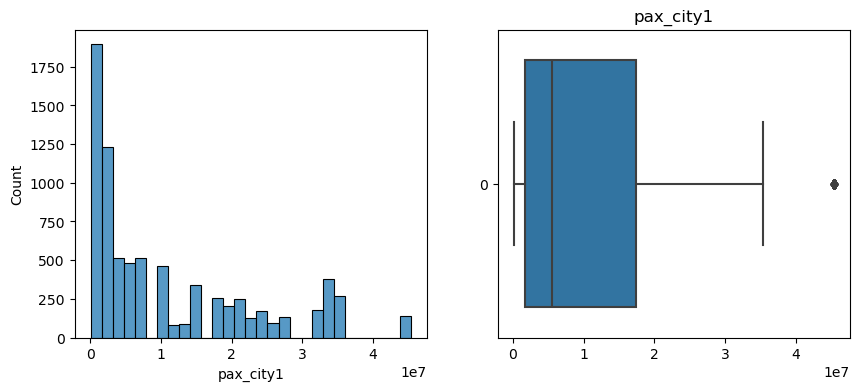

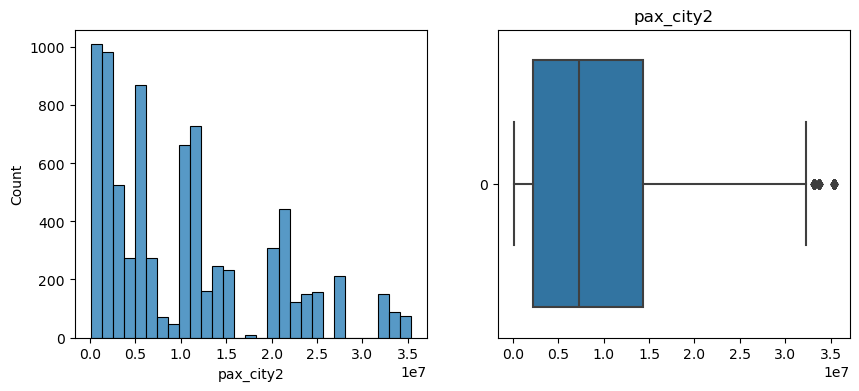

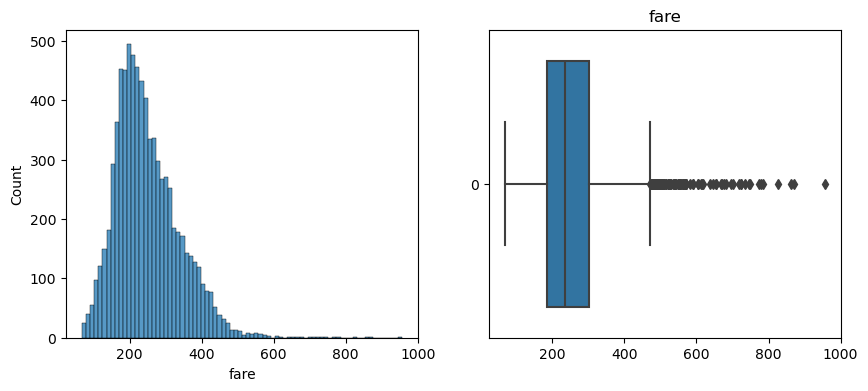

In [13]:
# Choose only the quantitative columns
for col in (quant_cols + [target]):
    fig, axs = plt.subplots(1,2, figsize=(10,4))
    sns.histplot(df[col], ax=axs[0])
    plt.title(col)
    sns.boxplot(df[col], orient='h', ax=axs[1])
    plt.title(col)
    plt.show()


Passenger counts and fare variables look to be good candidates for log transformation to achieve a more normal distribution. First I must remove the 164 0-count rows from the data (which are likely erroneous anyway).

In [15]:
df[(df.passengers == 0)].shape

(164, 20)

In [16]:
pop_outliers = df[(df.passengers == 0)]
df.drop(df[(df.passengers == 0)].index, inplace=True)
df.shape

(7639, 20)

In [17]:
# Do a log transformation on passenger counts and fares to produce more normally distributed values
#df.passengers = np.log(df.passengers)
#df.pax_city1 = np.log(df.pax_city1)
#df.pax_city2 = np.log(df.pax_city2)
#df.fare_lg = np.log(df.fare_lg)
#df.fare_low = np.log(df.fare_low)
df.fare = np.log(df.fare)

I originally did a log transform of all passenger and fare data. I subsequently learned that for the Random Forest algorithm, it is not necessary to do transformations of the input variables: "all 1-1 transformations (e.g. log [...] transformation of positive numbers, standardization, [...] etc.) have no effect for random forest, XGBoost, LightGBM and similar algorithms that pick cut-points in variables" (Bjorn, 2021). I chose to keep the log transform on the target variable.

In [19]:
namechg_dict = {'fare':'log_fare'}
""" {'passengers':'log_pax', 'pax_city1': 'log_pax_city1', 'pax_city2':'log_pax_city2', \
               # 'fare_lg':'log_fare_lg', 'fare_low':'log_fare_low', \ 
               Removed since no longer doing log transforms of these variables  """ 
                
df.rename(columns=namechg_dict, inplace=True)
# quant_cols = [namechg_dict.get(item, item) for item in quant_cols]
target = 'log_fare'

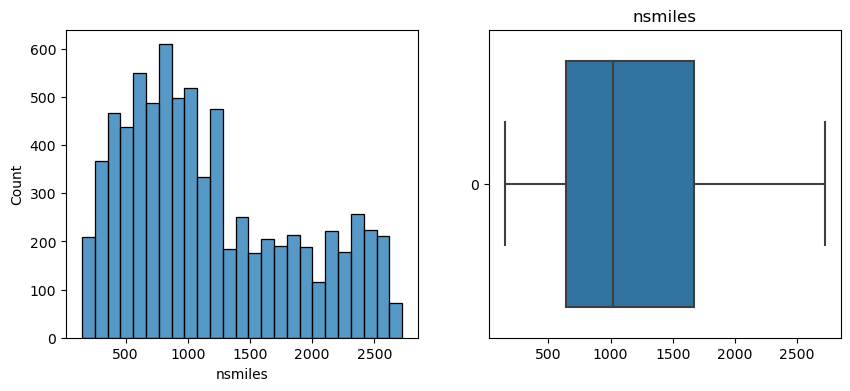

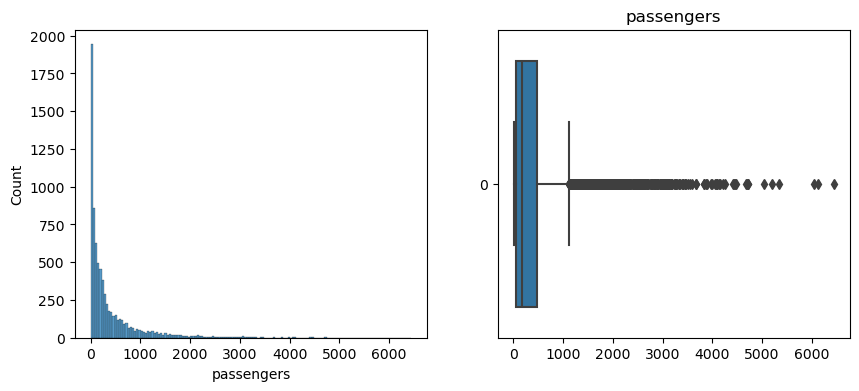

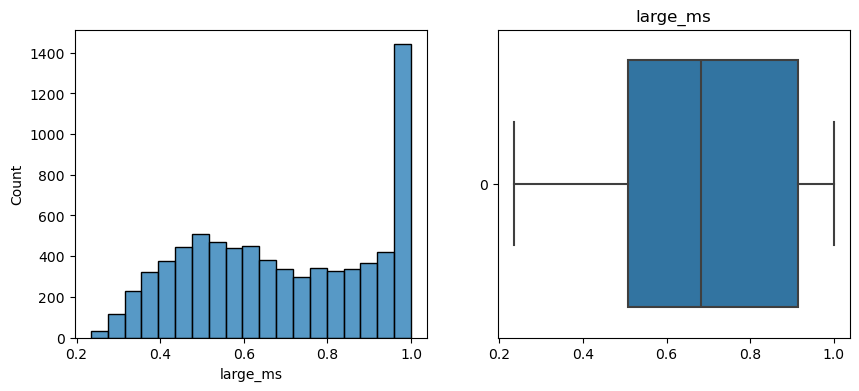

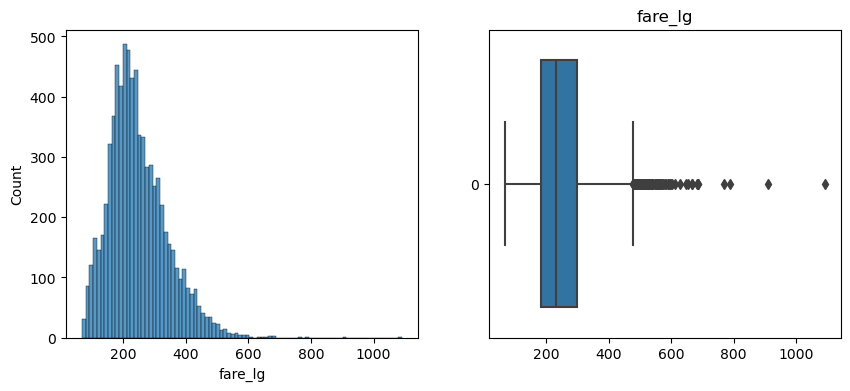

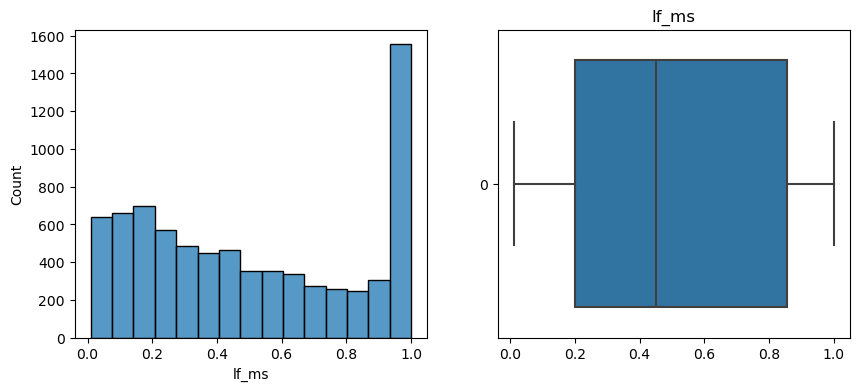

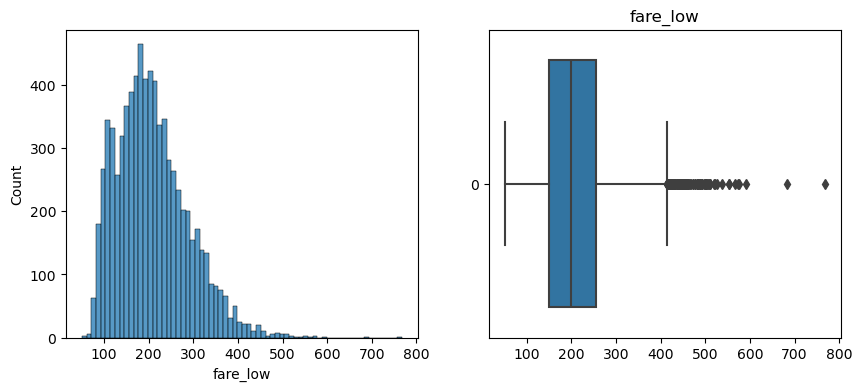

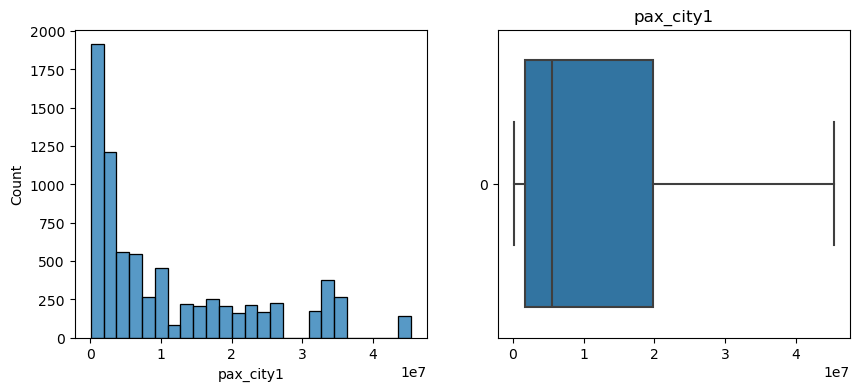

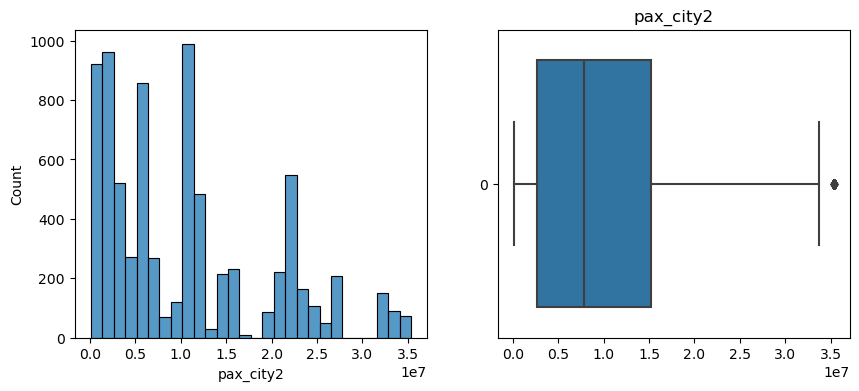

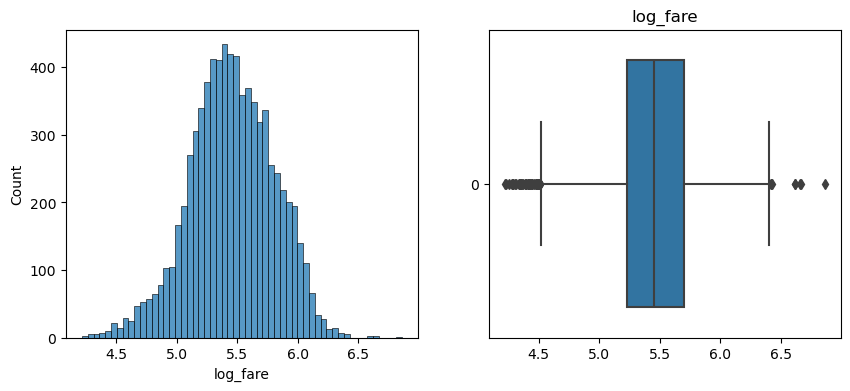

In [20]:
for col in (quant_cols + [target]):
    fig, axs = plt.subplots(1,2, figsize=(10,4))
    sns.histplot(df[col], ax=axs[0])
    plt.title(col)
    sns.boxplot(df[col], orient='h', ax=axs[1])
    plt.title(col)
    plt.show()

#### Treat categorical variables

In [22]:
for col in cat_cols:
    print(df[col].unique())

[1 2 3 4]
['WN' 'AA' 'UA' 'DL' 'B6' 'NK' 'AS' 'G4' 'F9' 'SY' 'MX' 'XP' '3M']
['WN' 'AA' 'DL' 'UA' 'B6' 'NK' 'F9' 'AS' 'G4' 'SY' 'MX' '3M' 'XP']
['ABQ' 'ACY' 'COS' 'DAL' 'DFW' 'PIT' 'HSV' 'ALB' 'AMA' 'DEN' 'ASE' 'ATL'
 'ATW' 'AUS' 'AVL' 'TUS' 'IWA' 'PHX' 'BDL' 'SEA' 'BGR' 'BHM' 'ELP' 'BIL'
 'BIS' 'CAK' 'CLE' 'BNA' 'BOI' 'BOS' 'MHT' 'PVD' 'BTV' 'BUF' 'BZN' 'BWI'
 'DCA' 'IAD' 'MDW' 'ORD' 'CHS' 'CID' 'CLT' 'CMH' 'LCK' 'STL' 'MYR' 'JAX'
 'DTW' 'DSM' 'HOU' 'IAH' 'MCO' 'EGE' 'VPS' 'EUG' 'EYW' 'FAR' 'FAT' 'MSP'
 'EWR' 'HPN' 'ISP' 'JFK' 'LGA' 'SWF' 'RSW' 'FNT' 'FWA' 'XNA' 'GSP' 'GRR'
 'GSO' 'HRL' 'LAS' 'IND' 'JAC' 'OAK' 'SFO' 'SJC' 'FLL' 'MIA' 'BUR' 'LAX'
 'LGB' 'ONT' 'SNA' 'SDF' 'CVG' 'SMF' 'TPA' 'MCI' 'SAT' 'MEM' 'OMA' 'MKE'
 'MSN' 'MSY' 'SAN' 'ORF' 'PHF' 'PNS' 'OKC' 'PAE' 'PDX' 'PHL' 'PSP' 'PWM'
 'RDM' 'RDU' 'RIC' 'RNO' 'ROC' 'SLC' 'SAV' 'SRQ' 'SYR' 'TYS' 'ABE' 'ACK'
 'BLI' 'CAE' 'DAY' 'JAN' 'LIT' 'GPI' 'MVY' 'CHO' 'HVN']
['DAL' 'DFW' 'PHX' 'BWI' 'DCA' 'IAD' 'MDW' 'ORD' 'HOU' 'IAH' 'EWR' 'HP

I chose to use Label encoding following the recommendation of Castellucci (2021).

In [24]:
# Code ref: https://castelluccipeter.medium.com/random-forest-regression-in-python-7b8d94958caa
le = LabelEncoder()
df[cat_cols] = df[cat_cols].apply(lambda col: le.fit_transform(col))

# Output prepped data set
df.to_csv('prepped_data.csv', index=False)
df.head()

,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,log_fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,pax_city1,pax_city2
0,0,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,1,14,580,213,5.151382,11,1.0000,172.67,11,1.0000,172.67,2317836,7819129
1,0,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,1,17,580,251,5.213304,1,0.9885,183.37,1,0.9885,183.37,2317836,35345138
2,0,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,1,72,328,481,5.107943,11,0.7070,164.17,11,0.7070,164.17,2317836,21852586
3,0,30140,30852,"Albuquerque, NM","Washington, DC (Metropolitan Area)",10140,10821,1,5,1670,108,5.386282,11,0.5798,214.66,4,0.2049,211.95,2317836,11151169
4,0,30140,30852,"Albuquerque, NM","Washington, DC (Metropolitan Area)",10140,11278,1,15,1670,114,5.681537,1,0.3751,304.32,11,0.3469,267.69,2317836,11553850


### Section D - Analysis
#### Train-test split

In [26]:
ind_var_cols = quant_cols + cat_cols
X = df[ind_var_cols].copy(deep=True)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=4877)

In [27]:
X_train.head()

,nsmiles,passengers,large_ms,fare_lg,lf_ms,fare_low,pax_city1,pax_city2,quarter,carrier_lg,carrier_low,airport_1,airport_2
2218,1107,3086,0.4786,230.57,0.2164,196.61,21852586,22157862,1,2,11,98,91
4273,902,18,0.6325,392.73,0.3072,262.98,1331035,27154885,2,4,1,13,42
2910,1979,72,0.4460,538.28,0.1461,331.08,13751197,2840758,1,4,11,41,64
6125,1342,653,0.7752,295.45,0.1032,113.19,10382573,10266324,3,10,6,9,33
2710,1750,119,0.9963,253.80,0.9963,253.80,9650281,1600987,1,11,11,78,47


In [28]:
## Define Grid 
grid = { 
    'n_jobs': [-1],
    'n_estimators': [50, 100, 200, 400],
    'max_features': ['sqrt'],
    'max_depth' : [5,6,7,8,9],
    'random_state' : [4877]
}
## show start time
print(datetime.now())
## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), scoring='neg_root_mean_squared_error', param_grid=grid, cv= 5)
CV_rfr.fit(X_train, y_train)
## show end time
print(datetime.now())


2024-06-03 15:50:28.617642
2024-06-03 15:50:48.461174


In [29]:
res = pd.DataFrame(CV_rfr.cv_results_)
res[res['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,param_n_jobs,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,0.347003,0.008509,0.051414,0.004686,9,sqrt,400,-1,4877,"{'max_depth': 9, 'max_features': 'sqrt', 'n_es...",-0.060384,-0.067607,-0.072293,-0.062167,-0.065163,-0.065523,0.004195,1


In [30]:
rf = CV_rfr.best_estimator_

In [31]:
prediction = rf.predict(X_test)
# Un-log-transform the target fare to get RMSE in $
mse = mean_squared_error(np.exp(y_test), np.exp(prediction))
rmse = root_mean_squared_error(np.exp(y_test), np.exp(prediction))
print(mse)
print(rmse)

212.7839914450396
14.587117311005612


### View one tree from the ensemble

Code ref: https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

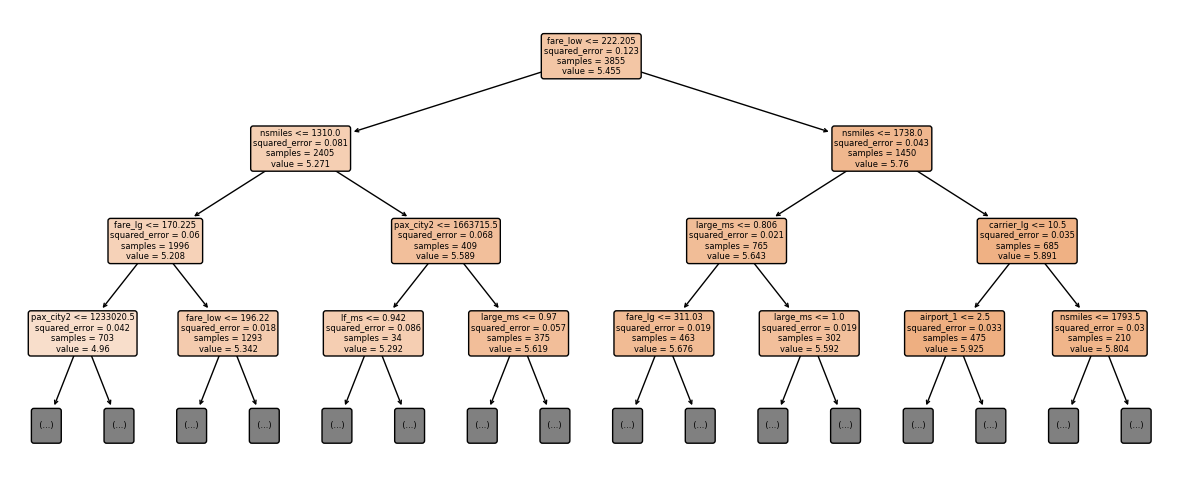

In [33]:
features = X.columns
# Obtain just the first tree
first_tree = rf.estimators_[0]

plt.figure(figsize=(15,6))
tree.plot_tree(first_tree,
               feature_names=features,
               fontsize=6,
               max_depth=3,
               filled=True, 
               rounded=True);

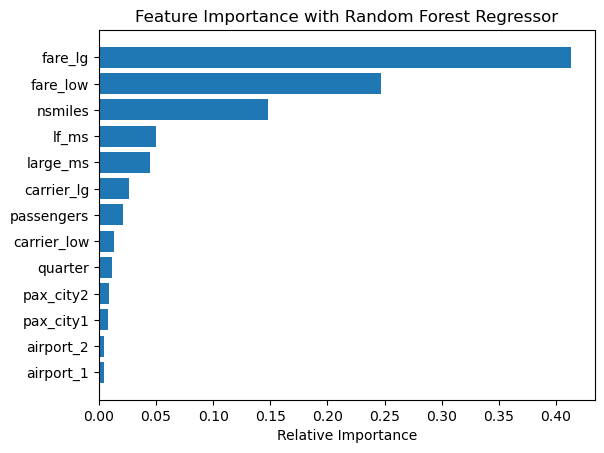

In [34]:
# Code ref: https://vitalflux.com/feature-importance-random-forest-classifier-python/#Interpreting_feature_importance_using_visualization_plot
importances = rf.feature_importances_
indices = range(len(importances))
names = [X.columns[i] for i in importances.argsort()]
plt.barh(indices, sorted(importances), align='center')
plt.title("Feature Importance with Random Forest Regressor")
plt.yticks(indices, names)
plt.xlabel('Relative Importance')
plt.show()

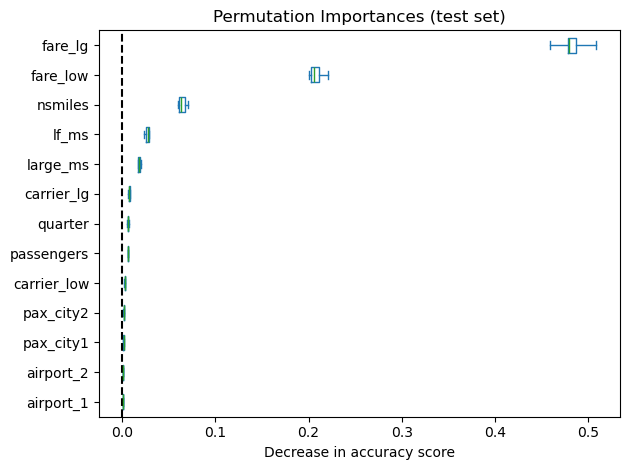

In [35]:
# Code ref: https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py
result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=4877, n_jobs=-1
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [36]:
rf.score(X_test, y_test)

0.9710658796272315